# General information

This work is a study for one of UNICEF projects aimed to improve the well-being of children around the world.

The essence of the project is to track the impact of living conditions of students aged 15 to 22 on their performance in mathematics in order to identify students at an early stage at risk.


<img src="image.jpg" width="300"/>


In [384]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

pd.set_option('display.max_rows', 150) # show more rows
pd.set_option('display.max_columns', 30) # show more columns

stud_math = pd.read_csv('stud_math.csv')

In [385]:
display(stud_math.head(5))
stud_math.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Rename column studytime, granular to a shorter name and some columns to lower case

In [386]:
stud_math.rename(columns={'studytime, granular':'studytime_g', 
                          'Pstatus':'pstatus','Medu':'medu',
                         'Fedu':'fedu','Mjob':'mjob','Fjob':'fjob'}, inplace=True,errors="raise")

In [387]:
#Display infromation about the columns values and print histogramm based on value types
def analyze_column(data, col):
    print(f'Analysing {col} column:')
    display(data[col].value_counts())
    dataTypeObj = data.dtypes[col]
    if str(dataTypeObj) == 'int64' or str(dataTypeObj) == 'float64':
        data[col].hist()
    display(data[col].describe())
    return

def replaceNaN(data, col):
    data[col].fillna(value = data[col].mode().values[0], inplace=True)
    return 

## Initial data analysis

In [388]:
analyze_column(stud_math,'school')

Analysing school column:


GP    349
MS     46
Name: school, dtype: int64

count     395
unique      2
top        GP
freq      349
Name: school, dtype: object

School column: No missing or incorrect values. 

In [389]:
analyze_column(stud_math,'sex')

Analysing sex column:


F    208
M    187
Name: sex, dtype: int64

count     395
unique      2
top         F
freq      208
Name: sex, dtype: object

Sex column: No missing or incorrect values. 

Analysing age column:


16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

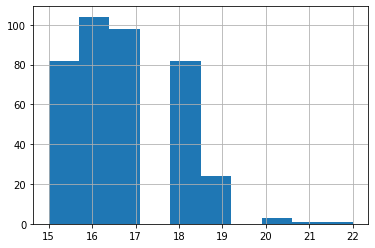

In [390]:
analyze_column(stud_math,'age')

Age column: No missing or incorrect values. All values belong to the expected interval  of (15,22)

In [391]:
#analysing address column

analyze_column(stud_math,'address')

Analysing address column:


U    295
R     83
Name: address, dtype: int64

count     378
unique      2
top         U
freq      295
Name: address, dtype: object

Address column: 17 values are missing. No incorrect values (not urban (U) or rural (R)) detected. Missing values to be replaced with mode

In [392]:
#analysing famsize column

analyze_column(stud_math,'famsize')

Analysing famsize column:


GT3    261
LE3    107
Name: famsize, dtype: int64

count     368
unique      2
top       GT3
freq      261
Name: famsize, dtype: object

Famsize column: 27 values are missing. No incorrect values (not 'LE3' <= 3, 'GT3' >3) detected

In [393]:
#analysing pstatus column
analyze_column(stud_math,'pstatus')

Analysing pstatus column:


T    314
A     36
Name: pstatus, dtype: int64

count     350
unique      2
top         T
freq      314
Name: pstatus, dtype: object

Pstatus column: 45 values are missing. No incorrect values detected

Analysing medu column:


4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: medu, dtype: int64

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

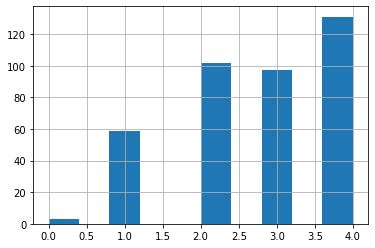

In [394]:
analyze_column(stud_math,'medu')

Medu column: 3 values are missing. No incorrect values detected. Very low data with no educated mothers, only 3 lines.

Analysing fedu column:


2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: fedu, dtype: int64

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64

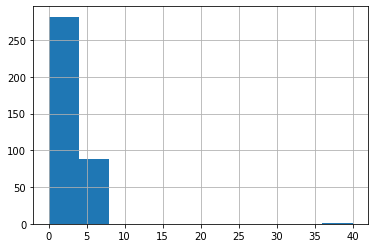

In [395]:
analyze_column(stud_math,'fedu')

Fedu column: 24 values are missing. Very low data with no educated fathers, only 2 lines. One incorrect value of '40' to be set to 4.0.

In [396]:
stud_math.loc[stud_math.fedu == 40.0, 'fedu'] = 4.0

In [397]:
analyze_column(stud_math,'mjob')

Analysing mjob column:


other       133
services     98
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64

count       376
unique        5
top       other
freq        133
Name: mjob, dtype: object

Mjob column: 19 values are missing. No incorrect values detected.

In [398]:
analyze_column(stud_math,'fjob')

Analysing fjob column:


other       197
services    102
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64

count       359
unique        5
top       other
freq        197
Name: fjob, dtype: object

Fjob column: 36 values are missing. No incorrect values detected.

In [399]:
analyze_column(stud_math,'reason')

Analysing reason column:


course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

count        378
unique         4
top       course
freq         137
Name: reason, dtype: object

Reason column: 17 values are missing. No incorrect values detected.

In [400]:
analyze_column(stud_math,'guardian')

Analysing guardian column:


mother    250
father     86
other      28
Name: guardian, dtype: int64

count        364
unique         3
top       mother
freq         250
Name: guardian, dtype: object

Guardian column: 31 values are missing. No incorrect values detected.

Analysing traveltime column:


1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

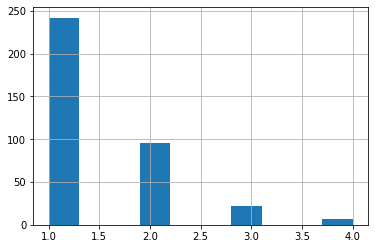

In [401]:
analyze_column(stud_math,'traveltime')

traveltime column: 28 values are missing. No outliers detected.

Analysing studytime column:


2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

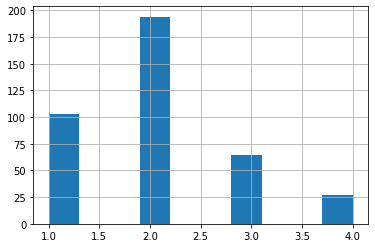

In [402]:
analyze_column(stud_math,'studytime')

studytime column: 7 values are missing. No outliers detected.

Analysing failures column:


0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

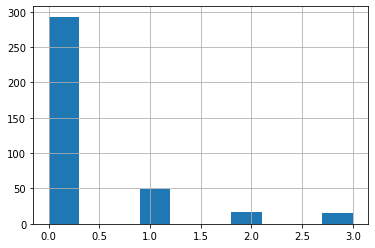

In [403]:
analyze_column(stud_math,'failures')

failures column: 22 values are missing. No outliers detected.

In [404]:
analyze_column(stud_math,'schoolsup')

Analysing schoolsup column:


no     335
yes     51
Name: schoolsup, dtype: int64

count     386
unique      2
top        no
freq      335
Name: schoolsup, dtype: object

schoolsup column: 9 values are missing. No incorrect values detected.

In [405]:
analyze_column(stud_math,'famsup')

Analysing famsup column:


yes    219
no     137
Name: famsup, dtype: int64

count     356
unique      2
top       yes
freq      219
Name: famsup, dtype: object

famsup column: 39 values are missing. No incorrect values detected.

In [406]:
analyze_column(stud_math,'paid')

Analysing paid column:


no     200
yes    155
Name: paid, dtype: int64

count     355
unique      2
top        no
freq      200
Name: paid, dtype: object

paid column: 40 values are missing. No incorrect values detected.

In [407]:
analyze_column(stud_math,'activities')

Analysing activities column:


yes    195
no     186
Name: activities, dtype: int64

count     381
unique      2
top       yes
freq      195
Name: activities, dtype: object

activities column: 14 values are missing. No incorrect values detected.

In [408]:
analyze_column(stud_math,'nursery')

Analysing nursery column:


yes    300
no      79
Name: nursery, dtype: int64

count     379
unique      2
top       yes
freq      300
Name: nursery, dtype: object

nursery column: 16 values are missing. No incorrect values detected.

Analysing studytime_g column:


-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime_g, dtype: int64

count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_g, dtype: float64

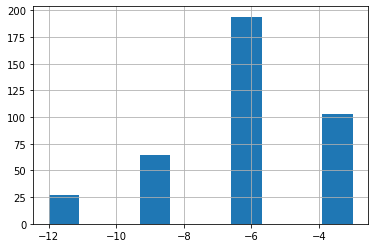

In [409]:
analyze_column(stud_math,'studytime_g')

studytime, granular column: 7 values are missing. No description of the data. 

In [410]:
analyze_column(stud_math,'higher')

Analysing higher column:


yes    356
no      19
Name: higher, dtype: int64

count     375
unique      2
top       yes
freq      356
Name: higher, dtype: object

higher column: 20 values are missing. No incorrect values detected.

Analysing goout column:


3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

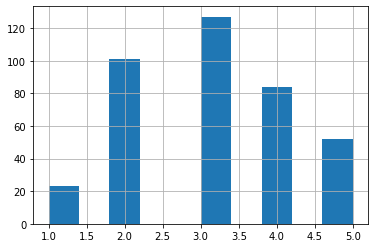

In [411]:
analyze_column(stud_math,'goout')

goout column: 8 values are missing. No outliers detected.

In [412]:
analyze_column(stud_math,'internet')

Analysing internet column:


yes    305
no      56
Name: internet, dtype: int64

count     361
unique      2
top       yes
freq      305
Name: internet, dtype: object

internet column: 34 values are missing. No incorrect values detected.

In [413]:
analyze_column(stud_math,'romantic')

Analysing romantic column:


no     240
yes    124
Name: romantic, dtype: int64

count     364
unique      2
top        no
freq      240
Name: romantic, dtype: object

romantic column: 31 values are missing. No incorrect values detected.

Analysing famrel column:


 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

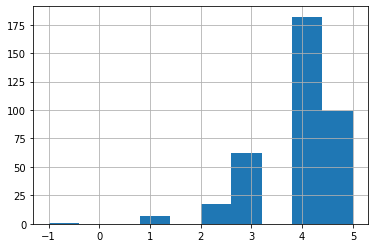

In [414]:
analyze_column(stud_math,'famrel')

famrel column: 27 values are missing. one incorrect value detected, to be corrected.

In [415]:
stud_math.loc[stud_math.famrel == -1, 'famrel'] = 1.0

Analysing freetime column:


3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

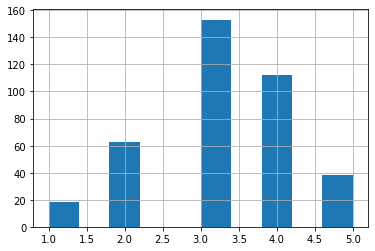

In [416]:
analyze_column(stud_math,'freetime')

freetime column: 11 values are missing. No incorrect values detected.

Analysing health column:


5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

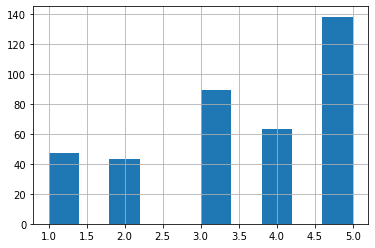

In [417]:
analyze_column(stud_math,'health')

 health column: 15 values are missing. No outliers detected.

Analysing absences column:


0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

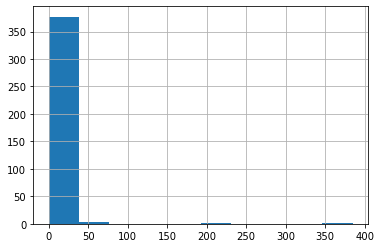

In [418]:
analyze_column(stud_math,'absences')

Most of the values are within 0 - 8 absences range. We can suspect (and even see) that there are outliers in the data. Let's analyse this assumption.

25-й percentile: 0.0, 75-й percentile: 8.0, IQR: 8.0,  Outliers borders: [-12.0, 20.0].


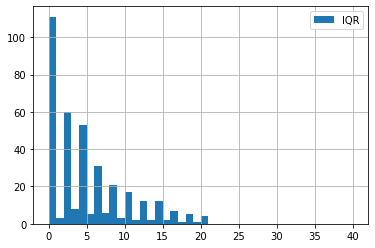

In [419]:
def outliers_check(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    perc25 = df[col].quantile(0.25)
    perc75 = df[col].quantile(0.75)
 
    print(
    '25-й percentile: {},'.format(perc25),
    '75-й percentile: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Outliers borders: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
    df[col].loc[df[col].between(
    perc25 - 1.5*IQR,
    perc75 + 1.5*IQR)].hist(bins = 40, range = (0, 40), label = 'IQR')
 
    plt.legend();
    return

outliers_check(stud_math, 'absences')

Most of the values are below 20 absences. We can set outliers values to mode ones.

In [420]:

stud_math.loc[stud_math.absences >20, 'absences'] = stud_math.absences.mode().values[0]


Analysing score column:


50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

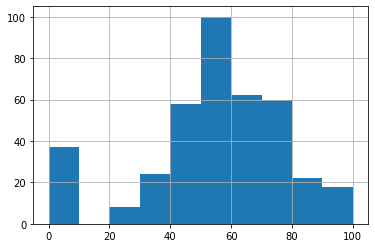

In [421]:
analyze_column(stud_math,'score')

Many values are concentrated at 0-level. Let's check the assumption that those are outliers.

25-й percentile: 40.0, 75-й percentile: 70.0, IQR: 30.0,  Outliers borders: [-5.0, 115.0].


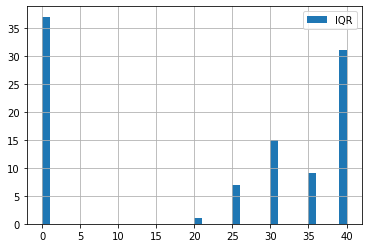

In [422]:
outliers_check(stud_math, 'score')

No outliers detected in column score.

In [423]:
#After all columns are analyzed, let's fill n/a values with mode ones
for col in stud_math.columns:
    replaceNaN(stud_math,col)

## Correlation analysis

<AxesSubplot:>

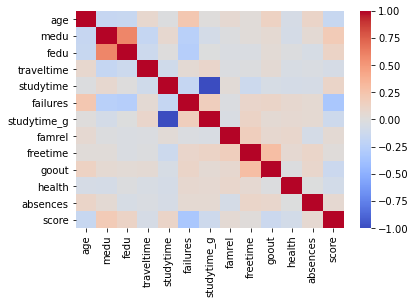

In [424]:
#let's see correlation between numercical columns:
correlation=stud_math.corr()
sns.heatmap(correlation, annot = False, cmap = "coolwarm")

In [425]:
stud_math.corr()

,age,medu,fedu,traveltime,studytime,failures,studytime_g,famrel,freetime,goout,health,absences,score
age,1.000000,-0.160777,-0.154781,0.084755,-0.015355,0.228081,0.015355,0.065250,0.026443,0.134069,-0.060506,0.112967,-0.155013
medu,-0.160777,1.000000,0.587159,-0.164282,0.073607,-0.243821,-0.073607,-0.013366,0.029204,0.062412,-0.066406,0.051652,0.200130
fedu,-0.154781,0.587159,1.000000,-0.120629,0.007754,-0.260690,-0.007754,-0.024077,-0.029868,0.039084,-0.009862,-0.049951,0.124703
traveltime,0.084755,-0.164282,-0.120629,1.000000,-0.094637,0.049670,0.094637,-0.019040,-0.012496,0.051775,-0.044325,-0.029449,-0.056523
studytime,-0.015355,0.073607,0.007754,-0.094637,1.000000,-0.166598,-1.000000,0.037638,-0.119014,-0.051090,-0.064860,-0.062318,0.113859
failures,0.228081,-0.243821,-0.260690,0.049670,-0.166598,1.000000,0.166598,-0.017230,0.094826,0.113649,0.072497,0.060636,-0.329683
studytime_g,0.015355,-0.073607,-0.007754,0.094637,-1.000000,0.166598,1.000000,-0.037638,0.119014,0.051090,0.064860,0.062318,-0.113859
famrel,0.065250,-0.013366,-0.024077,-0.019040,0.037638,-0.017230,-0.037638,1.000000,0.165324,0.074217,0.090195,-0.068134,0.052029
freetime,0.026443,0.029204,-0.029868,-0.012496,-0.119014,0.094826,0.119014,0.165324,1.000000,0.292305,0.064299,0.102057,0.016694
goout,0.134069,0.062412,0.039084,0.051775,-0.051090,0.113649,0.051090,0.074217,0.292305,1.000000,-0.013284,0.089099,-0.127923


Studytime and studytime, granular columns duplicate each other, one of them can be dropped from the model.
At this point we cannot exclude any other parameters as they may have not linear correlation. 
Some of the parameters are not numerical in nature, like famrel and should also be analyzed as qualitative.

In [426]:
stud_math = stud_math.drop(['studytime_g'], axis = 1)

In [427]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

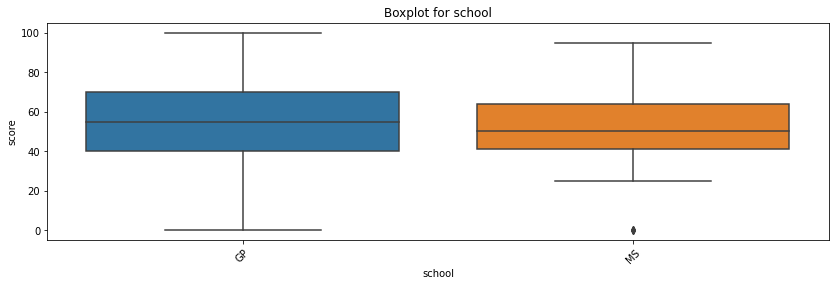

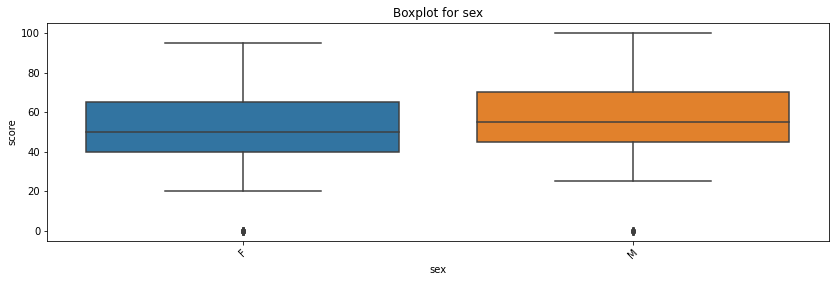

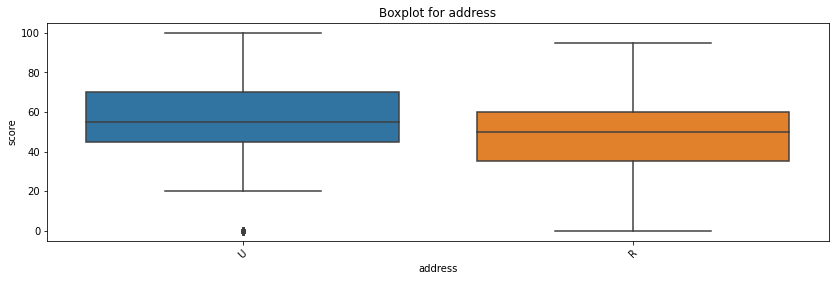

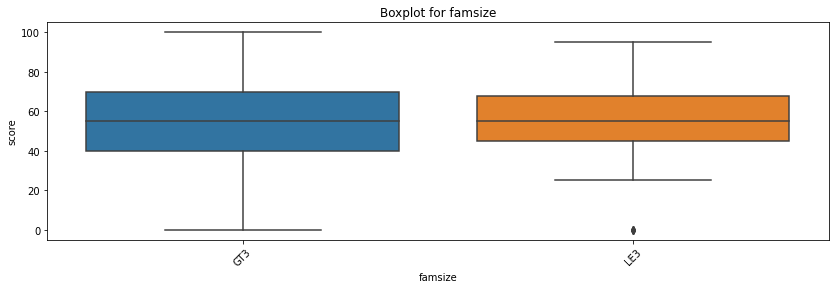

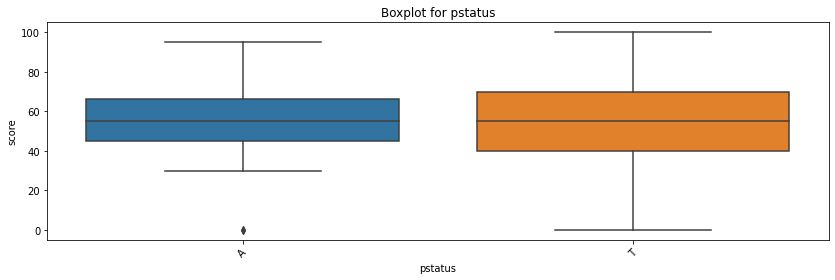

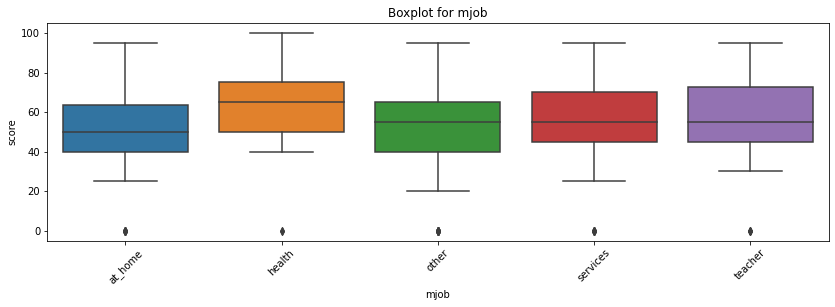

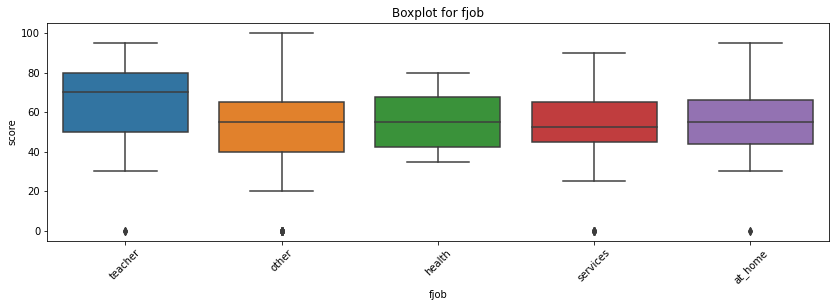

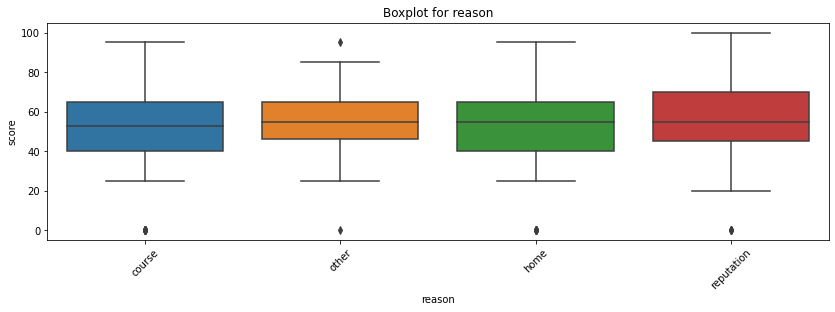

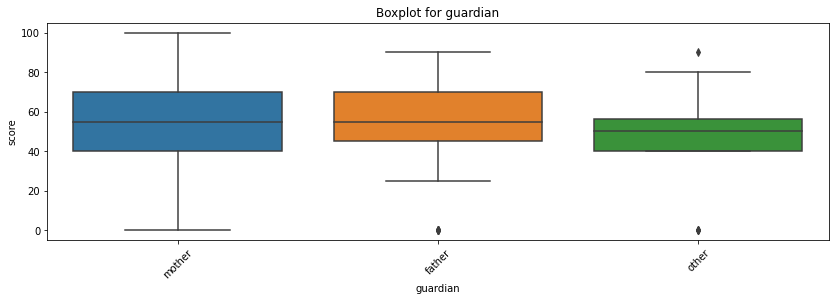

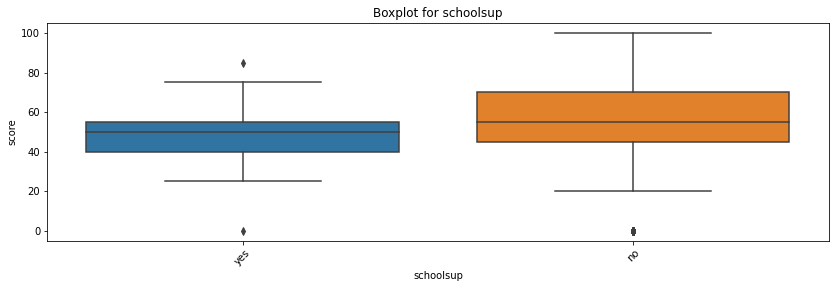

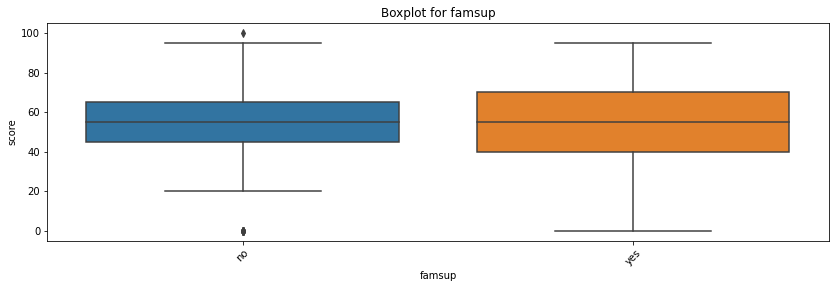

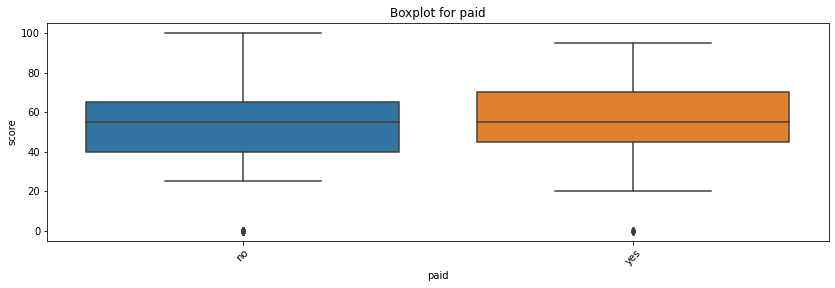

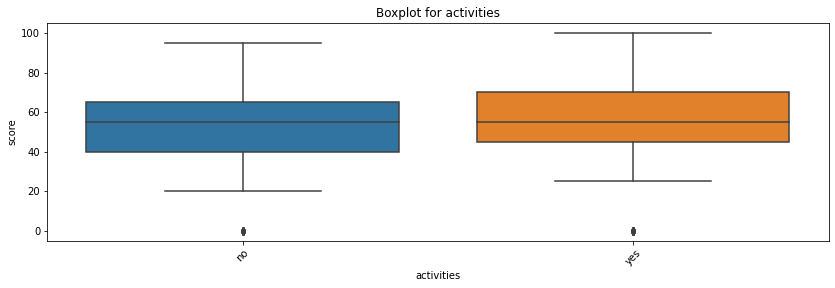

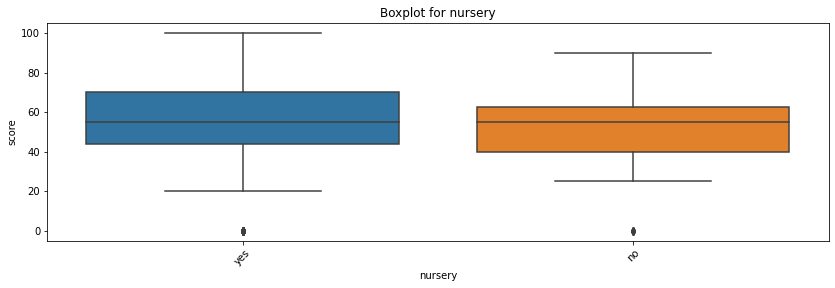

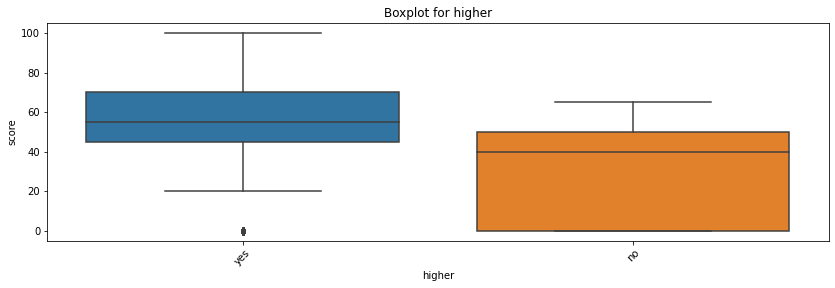

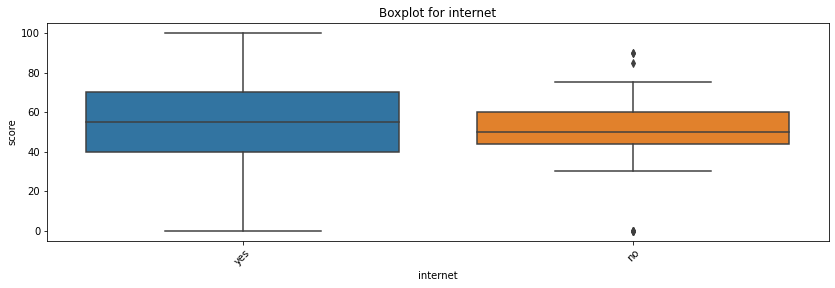

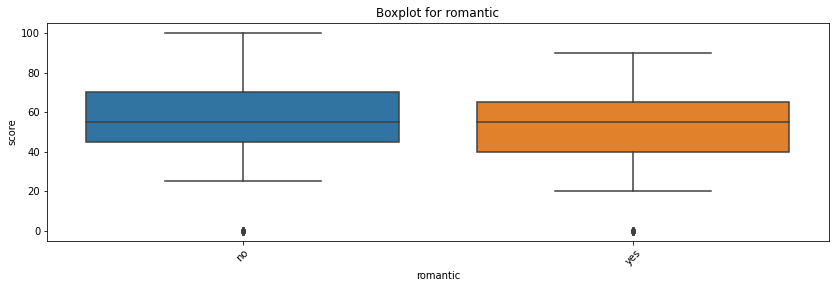

In [428]:
#for qualitative parameters let's print box plots to see the statistical differences
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

We can see that some columns show differences based on the data e.g. paid, mjob. Let's check this hypotesis for all qualitative columns.

In [429]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score'], nan_policy='omit').pvalue \
        <= 0.05/len(combinations_all): #Bonferroni correction
            print('Statistically significant differences found for column', column)
            break

In [430]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic',
            'medu', 'fedu','traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'health']:
    get_stat_dif(col)

Statistically significant differences found for column sex
Statistically significant differences found for column address
Statistically significant differences found for column mjob
Statistically significant differences found for column higher
Statistically significant differences found for column romantic
Statistically significant differences found for column medu


In [431]:
stud_math_for_model = stud_math.loc[:, ['sex', 'address', 'mjob', 'higher', 'romantic','medu']]
stud_math_for_model.head()

,sex,address,mjob,higher,romantic,medu
0,F,U,at_home,yes,no,4.0
1,F,U,at_home,yes,no,1.0
2,F,U,at_home,yes,no,1.0
3,F,U,health,yes,yes,4.0
4,F,U,other,yes,no,3.0


## Conlusion:

Based on EDA analysis of students living conditions impact on math score we can make following conclusions:

1. Relatively small amount of data was missing - less than 10% in each column.
2. Outliers identified only in absences column. 
3. Only 2 columns (family relations and father education) had incorrect values, most likely typo. We can conclude that raw data is quite clean.
4. Following parameters were identfied to have most impact on the math score of students: gender, address (urban or rural), mother education and occupation, student's aim for higher education, romantic relationship.
